In [1]:
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./movies.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
df= df.drop_duplicates()

In [4]:
df["YEAR"] = df["YEAR"].str.replace('[^0-9]','')
df["ONE-LINE"] = df["ONE-LINE"].str.replace('[^a-zA-Z0-9 ]','')
df["GENRE"]=df["GENRE"].str.strip("\n")

In [5]:
df["YEAR"]=df["YEAR"].apply(lambda x : str(x))
df["YEAR"]=df["YEAR"].apply(lambda x : (x[0:4] + ", " + x[4:8]) if len(x)>4 else x)

In [6]:
df[['directors', 'stars']] = df['STARS'].str.split('Stars:', expand=True)
df.drop("STARS", inplace=True,axis=1)

In [7]:
df['directors'] = df['directors'].str.split(':', expand=True)[1]
df = df.replace(r'\n', '', regex=True)
df["directors"] = df["directors"].str.replace('[^a-zA-Z0-9 ]','')
df["VOTES"]=df["VOTES"].str.replace('[^0-9.]','')

In [8]:
df.reset_index(drop=True)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,directors,stars
0,Blood Red Sky,"(202, 1)","Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth|,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,"(202, 1– )","Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,None,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"(201, 0–20","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,None,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,"(201, 3– )","Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,None,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,"(202, 1)","Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,Matthias Schweighöfer|,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...
9563,Totenfrau,"(202, 2– )","Drama, Thriller",NaN,Add a Plot,NaN,NaN,NaN,Nicolai Rohde|,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro..."
9564,Arcane,"(202, 1– )","Animation, Action, Adventure",NaN,Add a Plot,NaN,NaN,NaN,None,None
9565,Heart of Invictus,"(202, 2– )","Documentary, Sport",NaN,Add a Plot,NaN,NaN,NaN,Orlando von Einsiedel| Star,None
9566,The Imperfects,"(202, 1– )","Adventure, Drama, Fantasy",NaN,Add a Plot,NaN,NaN,NaN,Jovanka Vuckovic|,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


In [9]:
df = df.drop_duplicates(subset=['MOVIES', 'YEAR', 'GENRE', 'directors'])

In [10]:
df.isnull().sum()

MOVIES          0
YEAR            0
GENRE          78
RATING       1125
ONE-LINE        0
VOTES        1125
RunTime      1775
Gross        7111
directors    2823
stars        1102
dtype: int64

In [11]:
df['Gross'].unique()
Movie_Gross = df[df['Gross'].notnull()]

In [12]:
Movie_Gross.reset_index(drop = True)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,directors,stars
0,The Hitman's Bodyguard,"(201, 7)","Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...","205,979",118.0,$75.47M,Patrick Hughes|,"Ryan Reynolds, Samuel L. Jackson, Gary Oldman,..."
1,Jurassic Park,"(199, 3)","Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"897,444",127.0,$402.45M,Steven Spielberg|,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ..."
2,Don't Breathe,"(201, 6)","Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","237,601",88.0,$89.22M,Fede Alvarez|,"Stephen Lang, Jane Levy, Dylan Minnette, Danie..."
3,The Lord of the Rings: The Fellowship of the Ring,"(200, 1)","Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"1,713,028",178.0,$315.54M,Peter Jackson|,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
4,Escape Room,"(I) , (201","Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"99,351",99.0,$57.01M,Adam Robitel|,"Taylor Russell, Logan Miller, Jay Ellis, Tyler..."
...,...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,"(201, 0)",Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,245,90.0,$0.09M,Craig Teper|,"Beverly Adams, Elgin Charles, Grace Coddington..."
456,Men at Lunch,"(201, 2)","Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",331,75.0,$0.00M,Seán Ó Cualáin|,"Fionnula Flanagan, Peter Quinn, Ric Burns, Chr..."
457,Decoding Deepak,"(201, 2)",Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...",124,83.0,$0.01M,Gotham Chopra|,"Deepak Chopra, Gotham Chopra"
458,Theo Who Lived,"(201, 6)",Documentary,6.8,A documentary on American journalist Theo Padn...,111,86.0,$0.01M,David Schisgall| Star,None


In [13]:
Movies_no_rating = df[(df['VOTES'].isnull()) & (df['RATING'].isnull())]

df = df.dropna(subset=['RATING', 'VOTES'])
df.drop('Gross',inplace=True,axis=1)

In [14]:
Movie_Gross["Gross"] = Movie_Gross["Gross"].replace({'\$': '', ',': '', 'M': 'e6', 'K': 'e3', 'B': 'e9'}, regex=True)
Movie_Gross["Gross"] = pd.to_numeric(Movie_Gross["Gross"], errors='coerce')
Movie_Gross["VOTES"] = Movie_Gross["VOTES"].replace({'\$': '', ',': '', 'M': 'e6', 'K': 'e3'}, regex=True)
Movie_Gross["VOTES"] = pd.to_numeric(Movie_Gross["VOTES"], errors='coerce')

In [15]:
Movies_details = df
Movies_details["directors"]=Movies_details["directors"].str.replace('None','no directors')

In [16]:
from matplotlib import pyplot as plt
from pandasql import sqldf  

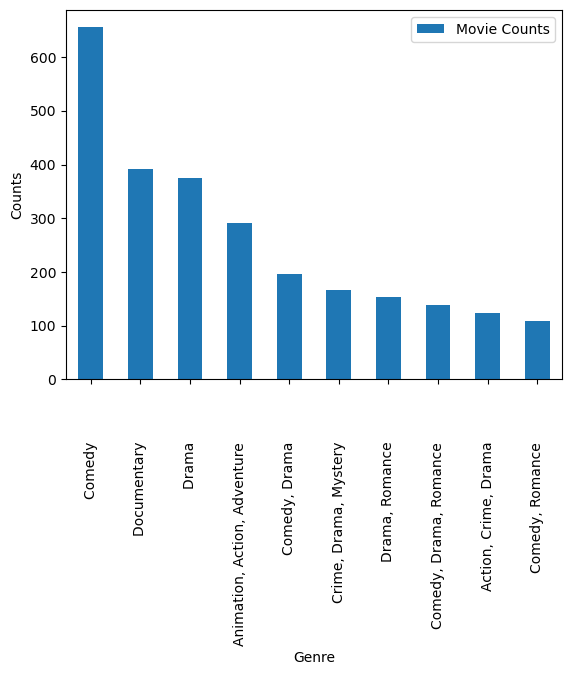

In [17]:
movie_genre = df["GENRE"].value_counts().head(n=10).plot(kind='bar')

movie_genre.set(xlabel="Genre", ylabel="Counts")
movie_genre.legend(["Movie Counts"])
plt.show()

         YEAR  total_count  count_with_high_rating
0    (202, 0)          502                     246
1    (201, 9)          436                     198
2    (201, 8)          393                     165
3  (202, 0– )          379                     248
4    (201, 7)          358                     148
5    (201, 6)          283                     115
6  (201, 9– )          269                     183
7  (201, 8– )          232                     172
8  (202, 1– )          226                     155
9    (202, 1)          208                      86

Average rating : 6.28


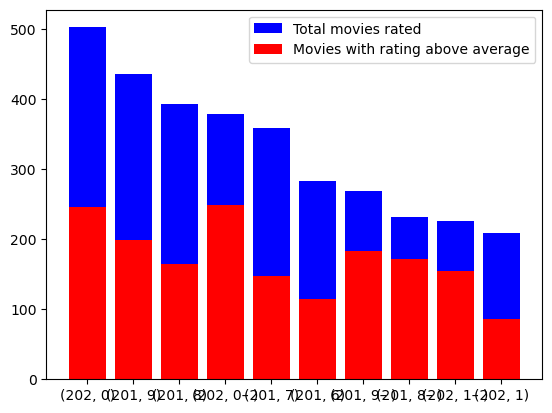

In [18]:
result = sqldf('''select Year, total_count, 
count_with_high_rating from(SELECT YEAR,COUNT(YEAR) AS total_count,
COUNT(CASE WHEN RATING > (select avg(rating) from df) THEN YEAR END) AS count_with_high_rating 
FROM df 
group by YEAR order by total_count desc);''',locals())
result = result.head(n=10)
print(result)
a=plt.bar(result['YEAR'], result['total_count'], color ='blue',label = 'Total movies rated')
b=plt.bar(result['YEAR'], result['count_with_high_rating'], color ='red',label="Movies with rating above average")
plt.legend(handles=[a,b])

print(f'\nAverage rating : {round(df["RATING"].astype(int).mean(),2)}')
plt.show()

<Axes: xlabel='GENRE'>

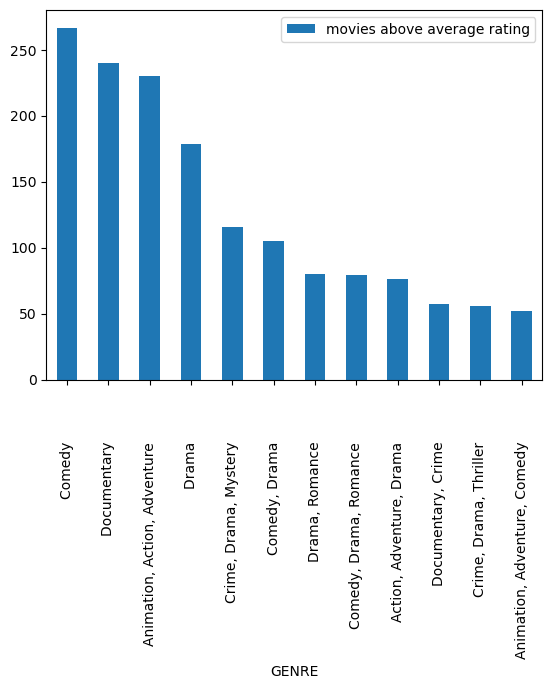

In [19]:
result = sqldf('''select genre, count(genre) as num_of_movies from df where rating > 6.8 group by genre order by num_of_movies desc;''',locals())
result.head(12).plot(x='GENRE', y= 'num_of_movies',kind='bar', label = 'movies above average rating')

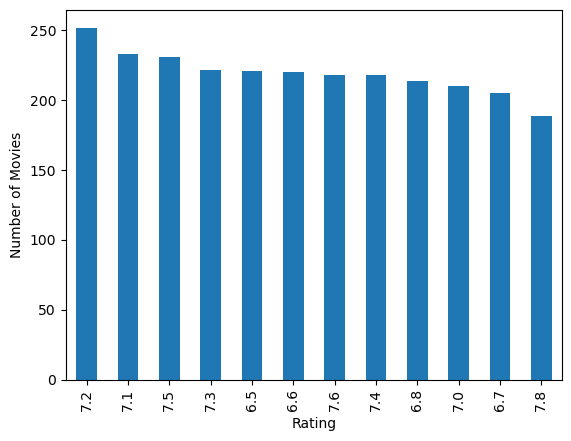

In [20]:
movie_stars = sqldf('''
select Rating, count(rating) as number_of_movies from df group by rating order by number_of_movies desc
''',locals())
movie_stars.head(n=12).plot(x='RATING', y='number_of_movies', kind='bar',xlabel="Rating", ylabel="Number of Movies",legend=None)

plt.show()

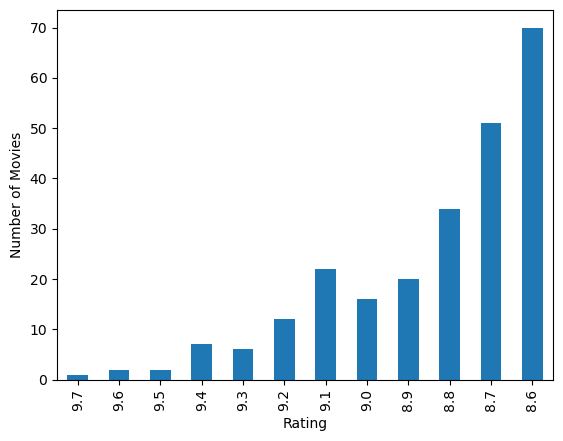

In [21]:
movie_stars = sqldf('''
select Rating, count(rating) as number_of_movies from df group by rating order by Rating desc
''',locals())
movie_stars.head(n=12).plot(x='RATING', y='number_of_movies', kind='bar',xlabel="Rating", ylabel="Number of Movies",legend=None)

plt.show()

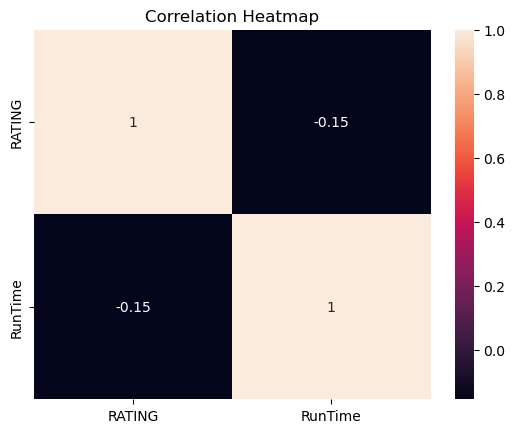

In [22]:
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()